In [124]:
import numpy as np
import math

In [125]:
def sigmoid(x):
    return (1/(1+math.e**(-x)))


In [126]:
def sigmoidprime(x):
    return sigmoid(x) * (1-sigmoid(x))

In [127]:
# To make sure that you get the implementation right let us first have a look at the data structure.
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])

# These are possible labels for all logical gates/tasks.
tasks = {
    "t_and" : np.array([0,0,0,1]),
    "t_or" : np.array([0,1,1,1]),
    "t_nand" : np.array([1,1,1,0]),
    "t_nor" : np.array([1,0,0,0]),
    "t_xor" : np.array([0,1,1,0])
}

In [128]:
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # 2. Define the learning rate as 1
        self.alpha = 1
        #store net-input of neuron
        self.weighted_sum = 0
        
    def forward_step(self, input):
        # Perform a perceptron forward step.
        # 1. Calculate the drive.
        self.weighted_sum = np.dot(input, self.weights)  + self.bias 

        # 2. Return activation of Perceptron
        return sigmoid(self.weighted_sum)

        
    #activation = activation array of previous perceptron layer
    def update(self, delta, activation):
        # 1. Bias update
        self.bias = self.bias - (self.alpha * delta)
        # 2. Weights update
        for i in range(self.input_units):
            self.weights[i] = self.weights[i] - (self.alpha * delta * activation[i])
        

In [129]:
class MLP:
    
    def __init__(self, task_label):
        #Store coorect labels for task
        self.task_label = task_label
        
        #Create array with 4 Perceptrons (hidden layer)
        self.perceptrons = np.array([Perceptron(2), Perceptron(2), Perceptron(2), Perceptron(2)])
        #Create the one read-out Perceptron
        self.readout_perceptron = Perceptron(4)
        
        #output of MLP
        self.output = 0.0
        #Storage of activity in hidden layer
        self.activation = np.empty(4)
    
    def forward_step(self, input_index):
        #current sample
        sample = x[input_index]
        
        #Processing drive for every Perceptron in hidden layer (self.perceptrons)
        for i in range(4):
            self.activation[i] = self.perceptrons[i].forward_step(sample)
        #Storing output of network
        self.output = self.readout_perceptron.forward_step(self.activation)
        
        
    def backprop_step(self, input_index):
        #current LABEL for this specific sample
        label = self.task_label[input_index]
                
        #DELTA calculation for read_out Perceptron
        # -(target-activation)*sigmoid'(drive) for l=N (output layer)
        readout_perceptron_delta = (-(label - self.output)) * sigmoidprime(self.readout_perceptron.weighted_sum)
        #delta calculation for hidden layer Perceptrons
        delta = np.empty(4)
        for i in range(4):
            # (sum irrelevant because in this case there is just one perceptron in subsequent layer)
            # delta(l+1)*weight(i)(l+1)*sigmoidprime(drive(l))
            delta[i] = readout_perceptron_delta * self.readout_perceptron.weights[i] * sigmoidprime(self.perceptrons[i].weighted_sum)
        
        #calling for UPDATE weights and bias
        #1. update output layer, with activations of hidden layer
        self.readout_perceptron.update(readout_perceptron_delta, self.activation)
        #2. update hidden layer with activation of previous layer (= input-sample)
        for i in range(4):
            self.perceptrons[i].update(delta[i], x[input_index])
            
            
        #Calculate LOSS and ACCURACY measurements for this specific trial
        #loss calculation
        single_loss = (label - self.output)**2
        #accuracy calculation
        if abs((label - self.output)) < 0.5:
            single_accuracy = 1
        else:
            single_accuracy = 0
            
        #returning both measurements for further, broader calculations
        return np.array([single_loss, single_accuracy])

In [130]:
#Logical operators to be trained
task_choice = np.array(["t_and", "t_or", "t_nand", "t_nor", "t_xor"])

#Storage of mean accuracy and mean loss per epoch, temporary storage of loss_sum and accuracy_sum for each individual epoch
accuracy = []
loss = []
accuracy_sum = 0
loss_sum = 0

#Randomly choose task
j = np.random.randint(0, 5)

#Display of logic operator to be trained on
print("LOGICAL OPERATOR that will be trained on: ")
print(task_choice[j])

task_label = tasks[task_choice[j]]

#Create MLP for each task/logical operator
MLP = MLP(task_label)
#repeat course for 1000 epochs
for i in range(1000):    
    #execute training for every possible data set/sample
    for k in range(4):
        #store input index for identification of label
        input_index = k
        #Do one training step, get individual loss and accuary measurements for this sample
        MLP.forward_step(input_index)
        single_measurements = MLP.backprop_step(input_index)

        #Sum up loss and accuracy measurements over one epoch (4 because of 4 samples)
        loss_sum = loss_sum + single_measurements[0]
        accuracy_sum = accuracy_sum + single_measurements[1]

    #Calculate mean accuracy and mean loss for this epoch and add it to accuracy list for visualization
    accuracy.append((accuracy_sum / 4))
    loss.append((loss_sum/4))

    #reset loss and accuracy count for one epoch
    loss_sum = 0
    accuracy_sum = 0
        

LOGICAL OPERATOR that will be trained on: 
t_nand


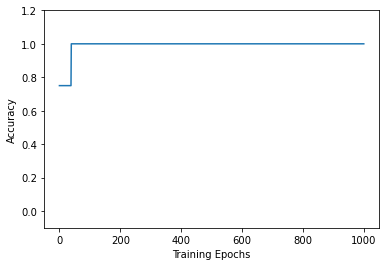

In [131]:
#Plot accuracy over epochs
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1000), accuracy)
plt.xlabel("Training Epochs")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

In [132]:
print(accuracy)

[0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

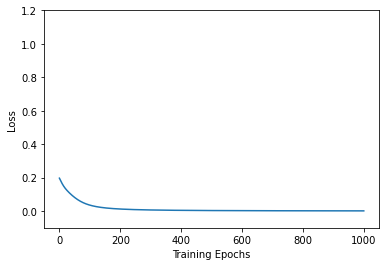

In [133]:
#Plot loss over epochs
plt.figure()
plt.plot(range(1000), loss)
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

In [134]:
print(loss)

[0.19662817631564392, 0.1928454501127536, 0.1890749682037139, 0.185326995168835, 0.18161262158552366, 0.17794446012749374, 0.1743362130358104, 0.17080159190207045, 0.1673530925953461, 0.16400098755235426, 0.16075271260409457, 0.15761267022991696, 0.15458237475695508, 0.15166082584149554, 0.14884499804153173, 0.1461303572553625, 0.1435113441751972, 0.14098179165010988, 0.1385352631251589, 0.13616531262705228, 0.1338656742471548, 0.1316303923664618, 0.1294539044949104, 0.12733108773292956, 0.12525727830970826, 0.12322827190672407, 0.12124031081138087, 0.11929006249353644, 0.11737459299913407, 0.11549133760416447, 0.1136380704401681, 0.1118128742529273, 0.11001411105244809, 0.10824039412220751, 0.10649056165158548, 0.1047636521153705, 0.10305888143098299, 0.10137562186439397, 0.09971338261969724, 0.09807179202757223, 0.09645058123906235, 0.09484956932932624, 0.09326864971854246, 0.09170777782205178, 0.09016695984780476, 0.08864624266539572, 0.08714570467688201, 0.08566544762491543, 0.0842